In [1]:
#import necessary modules
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#load and read the data in pandas dataframe
cc_apps= pd.read_csv(r'D:\tutorials\python- Datacamp\project\Predicting Credit Card Approvals\datasets\cc_approvals.data', 
                     index_col= None,header=None, na_values=["?"])
cc_apps.shape

(690, 16)

In [3]:
cc_apps.columns= ['Male', 'Age', 'Debt', 'Married', 'BankCustomer', 'EducationLevel', 'Ethinicity','YearsEmployed', 'PriorDefault',
                 'Employed', 'CreditScore', 'DriversLicense', 'Citizen', 'ZipCode', 'Income', 'Approved']
cc_apps.columns

Index(['Male', 'Age', 'Debt', 'Married', 'BankCustomer', 'EducationLevel',
       'Ethinicity', 'YearsEmployed', 'PriorDefault', 'Employed',
       'CreditScore', 'DriversLicense', 'Citizen', 'ZipCode', 'Income',
       'Approved'],
      dtype='object')

In [4]:
#understand the dataframe
print(cc_apps.head())

  Male    Age   Debt Married BankCustomer EducationLevel Ethinicity  \
0    b  30.83  0.000       u            g              w          v   
1    a  58.67  4.460       u            g              q          h   
2    a  24.50  0.500       u            g              q          h   
3    b  27.83  1.540       u            g              w          v   
4    b  20.17  5.625       u            g              w          v   

   YearsEmployed PriorDefault Employed  CreditScore DriversLicense Citizen  \
0           1.25            t        t            1              f       g   
1           3.04            t        t            6              f       g   
2           1.50            t        f            0              f       g   
3           3.75            t        t            5              t       g   
4           1.71            t        f            0              f       s   

   ZipCode  Income Approved  
0    202.0       0        +  
1     43.0     560        +  
2    280.0    

In [5]:
cc_apps.isnull().sum()

Male              12
Age               12
Debt               0
Married            6
BankCustomer       6
EducationLevel     9
Ethinicity         9
YearsEmployed      0
PriorDefault       0
Employed           0
CreditScore        0
DriversLicense     0
Citizen            0
ZipCode           13
Income             0
Approved           0
dtype: int64

In [6]:
cc_apps.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 690 entries, 0 to 689
Data columns (total 16 columns):
Male              678 non-null object
Age               678 non-null float64
Debt              690 non-null float64
Married           684 non-null object
BankCustomer      684 non-null object
EducationLevel    681 non-null object
Ethinicity        681 non-null object
YearsEmployed     690 non-null float64
PriorDefault      690 non-null object
Employed          690 non-null object
CreditScore       690 non-null int64
DriversLicense    690 non-null object
Citizen           690 non-null object
ZipCode           677 non-null float64
Income            690 non-null int64
Approved          690 non-null object
dtypes: float64(4), int64(2), object(10)
memory usage: 86.3+ KB


As you can see in above output,any row count is not matching with shape of dataframe, it meant those rows will have missing values

In [7]:
#drop the columns which is not critical to our analysis
cc_apps.drop(['ZipCode', 'DriversLicense', 'Ethinicity'], axis= 'columns', inplace=True)

In [8]:
#Male, Age, BankCustomer have critical to our analysis.hence replaced with missing values
cc_apps['Male'].fillna(method='ffill', inplace=True)
cc_apps['Age'].fillna((cc_apps['Age'].mean()), inplace=True)
cc_apps['BankCustomer'].fillna(method='ffill', inplace=True)

In [9]:
# drop the rows which have missing values. since the missing values present in dataframe is minimal, we are dropping those 
cc_apps.dropna(axis='rows', inplace=True)

In [10]:
cc_apps.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 681 entries, 0 to 689
Data columns (total 13 columns):
Male              681 non-null object
Age               681 non-null float64
Debt              681 non-null float64
Married           681 non-null object
BankCustomer      681 non-null object
EducationLevel    681 non-null object
YearsEmployed     681 non-null float64
PriorDefault      681 non-null object
Employed          681 non-null object
CreditScore       681 non-null int64
Citizen           681 non-null object
Income            681 non-null int64
Approved          681 non-null object
dtypes: float64(3), int64(2), object(8)
memory usage: 74.5+ KB


In [11]:
cc_apps.head()

,Male,Age,Debt,Married,BankCustomer,EducationLevel,YearsEmployed,PriorDefault,Employed,CreditScore,Citizen,Income,Approved
0,b,30.83,0.000,u,g,w,1.25,t,t,1,g,0,+
1,a,58.67,4.460,u,g,q,3.04,t,t,6,g,560,+
2,a,24.50,0.500,u,g,q,1.50,t,f,0,g,824,+
3,b,27.83,1.540,u,g,w,3.75,t,t,5,g,3,+
4,b,20.17,5.625,u,g,w,1.71,t,f,0,s,0,+


In [12]:
categorical_cols= ['Male','Married', 'BankCustomer', 'EducationLevel', 'PriorDefault', 'Employed', 'Citizen', 'Approved']

cc_apps[categorical_cols]= cc_apps[categorical_cols].astype('category')


In [13]:
cc_apps.corr()

,Age,Debt,YearsEmployed,CreditScore,Income
Age,1.000000,0.209527,0.408741,0.195127,0.020509
Debt,0.209527,1.000000,0.294551,0.268035,0.121781
YearsEmployed,0.408741,0.294551,1.000000,0.319522,0.049880
CreditScore,0.195127,0.268035,0.319522,1.000000,0.062580
Income,0.020509,0.121781,0.049880,0.062580,1.000000


In [14]:
#summary statistics of numerical columns
cc_apps.describe()

,Age,Debt,YearsEmployed,CreditScore,Income
count,681.000000,681.000000,681.000000,681.000000,681.000000
mean,31.453933,4.806990,2.251872,2.431718,1030.330396
std,11.657434,4.988754,3.359283,4.887119,5243.226720
min,13.750000,0.000000,0.000000,0.000000,0.000000
25%,22.670000,1.000000,0.165000,0.000000,0.000000
50%,28.580000,2.875000,1.000000,0.000000,5.000000
75%,37.500000,7.500000,2.750000,3.000000,400.000000
max,76.750000,28.000000,28.500000,67.000000,100000.000000


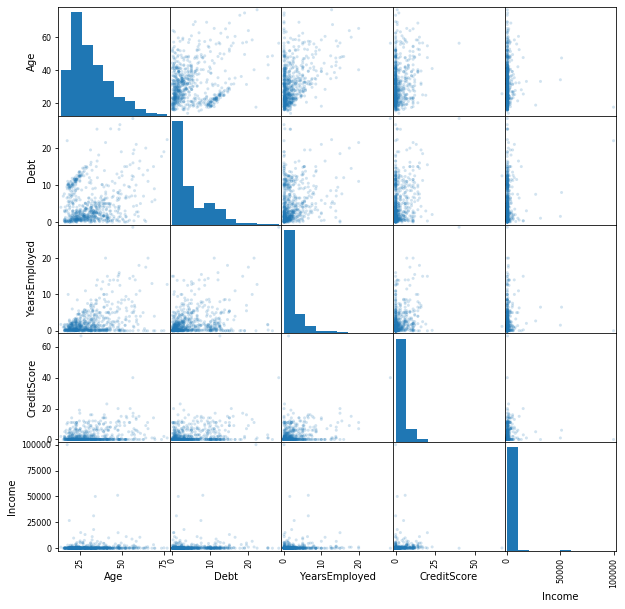

In [15]:
pd.plotting.scatter_matrix(cc_apps, alpha= 0.2, figsize=[10,10])
plt.show()

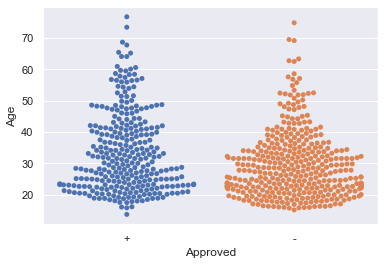

In [16]:
sns.set()
sns.swarmplot(x='Approved', y='Age', data=cc_apps)
plt.show()

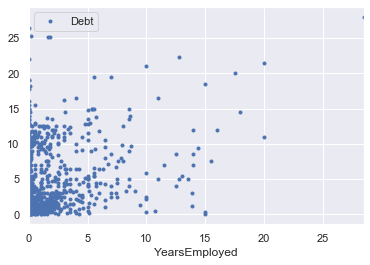

In [17]:
cc_apps.plot(x='YearsEmployed', y='Debt', marker='.', linestyle='None')
plt.show()

In [18]:

cc_apps['Male']= cc_apps['Male'].cat.codes
cc_apps['Married']=cc_apps['Married'].cat.codes
cc_apps['BankCustomer']=cc_apps['BankCustomer'].cat.codes
cc_apps['EducationLevel']=cc_apps['EducationLevel'].cat.codes
cc_apps['PriorDefault']=cc_apps['PriorDefault'].cat.codes
cc_apps['Employed']=cc_apps['Employed'].cat.codes
cc_apps['Citizen']=cc_apps['Citizen'].cat.codes

cc_apps['Approved']= cc_apps['Approved'].cat.codes

In [19]:
# Correlation with CKD classification and sort with descending order based on correlation value
cc_apps_corr= cc_apps.corr()['Approved']
cc_apps_corr.sort_values(ascending = False)

Approved          1.000000
Married           0.190682
BankCustomer      0.181349
Citizen           0.105723
Male              0.026319
EducationLevel   -0.132335
Age              -0.167271
Income           -0.176939
Debt             -0.211192
YearsEmployed    -0.325734
CreditScore      -0.409741
Employed         -0.463602
PriorDefault     -0.732960
Name: Approved, dtype: float64

In [20]:
# Splitting the data into X and y
X_data = cc_apps.iloc[:, :-1].values
y_data = cc_apps.iloc[:, -1:].values.reshape(len(cc_apps),)
 
# Printing the shape
X_data.shape, y_data.shape

((681, 12), (681,))

In [21]:
# Splitting the dataset into Training set and Testing Set
from sklearn.model_selection import train_test_split

seed=3
# Creating a 70-30 split
X_train, X_test, y_train, y_test = train_test_split(X_data, y_data, test_size = 0.3, random_state=seed)

# Getting the shape of the data
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((476, 12), (476,), (205, 12), (205,))

In [22]:
# Feature scaling
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)

X_train, X_test

(array([[ 0.69488563, -1.22999311, -0.9309749 , ..., -0.55551855,
         -0.27957274, -0.1841426 ],
        [ 0.69488563,  0.1230888 ,  0.12540982, ...,  2.2852352 ,
         -0.27957274, -0.00698471],
        [-1.43908573,  3.13551606,  1.99250838, ...,  2.75869416,
         -0.27957274,  0.41394243],
        ...,
        [-1.43908573, -0.7279219 , -0.87397926, ..., -0.55551855,
          3.63444568, -0.1841426 ],
        [ 0.69488563,  0.7573721 ,  3.26999688, ...,  2.04850573,
         -0.27957274,  0.02844687],
        [-1.43908573, -0.14217215, -0.5624686 , ..., -0.55551855,
         -0.27957274, -0.18113091]]),
 array([[ 0.61305703, -1.00664319, -0.11710905, ..., -0.42801455,
         -0.35549068, -0.21918276],
        [ 0.61305703,  0.3244329 , -0.82991653, ..., -0.42801455,
         -0.35549068, -0.24328972],
        [-1.63116961, -1.14434072, -0.84786871, ..., -0.42801455,
         -0.35549068, -0.24208437],
        ...,
        [ 0.61305703, -1.15168459, -0.92706954, ..., -

In [23]:
from sklearn.linear_model import LogisticRegression

# Create the logistic regression model
model = LogisticRegression(solver='lbfgs', max_iter=1800, random_state=seed)
# Fit the model
model.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1800,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=3, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [24]:
# Predict the test set
y_pred = model.predict(X_test)
y_pred

array([1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1,
       0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0,
       0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0,
       1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0,
       1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1,
       0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0,
       1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0,
       1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0,
       0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0,
       0, 1, 1, 0, 1, 1, 0], dtype=int8)

In [25]:
# Coefficients of the model and its intercept
print(model.coef_)
print(model.intercept_)

[[-0.03678703  0.24481139 -0.18284491  0.95669409 -0.43550432 -0.32193414
  -0.3466991  -1.89099257 -0.19905548 -0.72566211 -0.02034274 -1.32690323]]
[0.43030572]


In [26]:
# To display the equation we'll use the sigmoid function
def sigmoid(x):
    return 1/(1 + np.exp(-x))

In [27]:
# Proving the python equation works for index 0

y_calculated = sigmoid(np.dot(X_test[0], model.coef_[0]) + model.intercept_)
mask = y_calculated >= 0.5
y_calculated[mask] = 1
y_calculated[~mask] = 0
y_calculated == y_test[0]

array([ True])

In [28]:
# Making the confusion matrix
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

cm = confusion_matrix(y_test,y_pred)
acc_score = accuracy_score(y_test, y_pred)

print(f"Accuracy = {acc_score*100:.2f}%")
print(f"Confusion matrix = \n{cm}")

Accuracy = 82.44%
Confusion matrix = 
[[78 12]
 [24 91]]


In [29]:
# Complete classification report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.76      0.87      0.81        90
           1       0.88      0.79      0.83       115

    accuracy                           0.82       205
   macro avg       0.82      0.83      0.82       205
weighted avg       0.83      0.82      0.83       205

